In [ ]:

import gpxpy
import gpxpy.gpx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import haversine as hs

plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [8]:
with open('data/gpx_files/2017 Criterium du Dauphine Stage 8.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [9]:
gpx

GPX(tracks=[GPXTrack(name='Criterium du DauphinÃ© 2017 - Stage 8', segments=[GPXTrackSegment(points=[...])])])

In [10]:
gpx.get_track_points_no()

9235

In [11]:
gpx.get_elevation_extremes()

MinimumMaximum(minimum=436.0, maximum=1652.0)

In [12]:
gpx.get_uphill_downhill()

UphillDownhill(uphill=4100.100000000003, downhill=3040.100000000003)

In [13]:
gpx.length_2d()

115131.40459899796

In [14]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [22]:
route_df['elevation_diff'] = route_df['elevation'].diff()

route_df.head()

,latitude,longitude,elevation,distance,elevation_diff
0,45.68665,6.40358,437.0,NaN,NaN
1,45.68673,6.40374,436.0,15.28,-1.0
2,45.68673,6.40374,436.0,0.00,0.0
3,45.68679,6.40378,436.0,7.36,0.0
4,45.68682,6.40382,436.0,4.56,0.0


In [15]:
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,45.68665,6.40358,437.0
1,45.68673,6.40374,436.0
2,45.68673,6.40374,436.0
3,45.68679,6.40378,436.0
4,45.68682,6.40382,436.0


In [18]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2, lon2),
        unit=hs.Unit.METERS
    )
    return np.round(distance, 2)

In [19]:
distances = [np.nan]

for i in range(len(route_df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=route_df.iloc[i - 1]['latitude'],
            lon1=route_df.iloc[i - 1]['longitude'],
            lat2=route_df.iloc[i]['latitude'],
            lon2=route_df.iloc[i]['longitude']
        ))
        
route_df['distance'] = distances
route_df.head()

,latitude,longitude,elevation,distance
0,45.68665,6.40358,437.0,NaN
1,45.68673,6.40374,436.0,15.28
2,45.68673,6.40374,436.0,0.00
3,45.68679,6.40378,436.0,7.36
4,45.68682,6.40382,436.0,4.56


In [23]:
route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df['cum_distance'] = route_df['distance'].cumsum()

route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_elevation,cum_distance
0,45.68665,6.40358,437.0,NaN,NaN,NaN,NaN
1,45.68673,6.40374,436.0,15.28,-1.0,-1.0,15.28
2,45.68673,6.40374,436.0,0.00,0.0,-1.0,15.28
3,45.68679,6.40378,436.0,7.36,0.0,-1.0,22.64
4,45.68682,6.40382,436.0,4.56,0.0,-1.0,27.20


In [24]:
route_df = route_df.fillna(0)

route_df.head()

,latitude,longitude,elevation,distance,elevation_diff,cum_elevation,cum_distance
0,45.68665,6.40358,437.0,0.00,0.0,0.0,0.00
1,45.68673,6.40374,436.0,15.28,-1.0,-1.0,15.28
2,45.68673,6.40374,436.0,0.00,0.0,-1.0,15.28
3,45.68679,6.40378,436.0,7.36,0.0,-1.0,22.64
4,45.68682,6.40382,436.0,4.56,0.0,-1.0,27.20


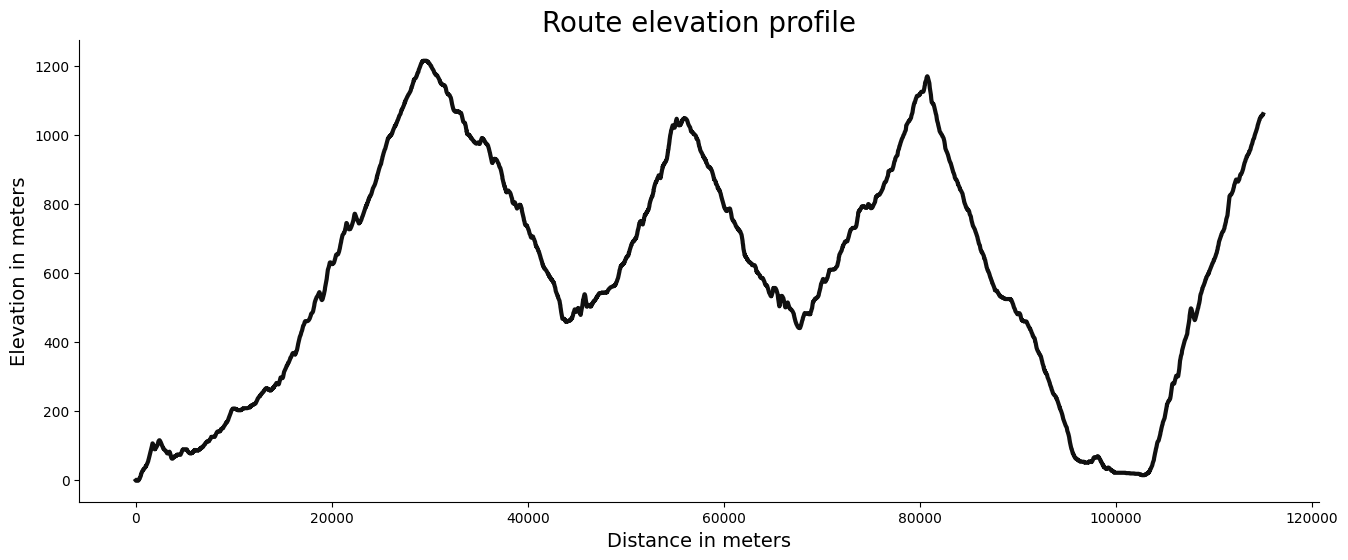

In [25]:
plt.plot(route_df['cum_distance'], route_df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in meters', size=14)
plt.ylabel('Elevation in meters', size=14);
plt.savefig('fig.jpg', dpi=300, bbox_inches='tight')

In [29]:

# Import the CSV file into a Pandas DataFrame
input_file = "data/race_results_2017_2023.csv"
df = pd.read_csv(input_file)

# Convert the 'Rank' column to numeric, forcing errors to NaN
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Filter the DataFrame where Rank >= 3
filtered_df = df[df['Rank'] <= 3]




In [31]:
filtered_df.head()

,Race Name,Date,Rank,Team,Name,Time,UCI points,PCS points,Team Time Trial,TimeAfterTeamTTT
0,2021 Paris-Mantes Cycliste,17 October 2021,1.0,VC Villefranche Beaujolais,JARNET Maxime,3:53:13,40.0,15.0,0,NaN
1,2021 Paris-Mantes Cycliste,17 October 2021,2.0,USSA Pavilly Barentin,THÉOT Hugo,0:00,30.0,10.0,0,NaN
2,2021 Paris-Mantes Cycliste,17 October 2021,3.0,EC Saint-Etienne Loire,LEBRETON Jacques,0:25,25.0,7.0,0,NaN
91,2021 Paris-Nice Stage 1,07 March 2021,1.0,Deceuninck - Quick Step,BENNETT Sam,3:51:38,60.0,50.0,0,NaN
92,2021 Paris-Nice Stage 1,07 March 2021,2.0,Groupama - FDJ,DÉMARE Arnaud,0:00,25.0,30.0,0,NaN


In [32]:

# Export the filtered DataFrame to a new CSV file
output_file = "data/race_results_top3.csv"
filtered_df.to_csv(output_file, index=False)

print(f"Filtered data has been saved to {output_file}")

Filtered data has been saved to data/race_results_top3.csv
